In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_colwidth=100
import seaborn as sns

In [2]:
def jaccard_similarity(str1, str2):
    string_set1 = set(str1.split(' '))
    string_set2 = set(str2.split(' '))
    return len(string_set1.intersection(string_set2))/len(string_set2.union(string_set1))

In [3]:
# dump pkl into a pandas dataframe. 
data = pd.read_pickle('data/string_study.pkl')
data["word_count"] = data._info.apply(lambda x:len(x.split(' ')))
class_by_len = set(data["word_count"])
bin_len = len(class_by_len)
bin_len

45

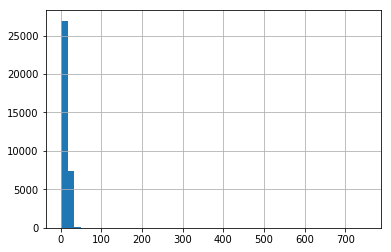

In [4]:
# Analysis of messages categorized into words
data.word_count.hist(bins = bin_len)

In [37]:
# Array to store the seaborn plots
seaborn_datapoints = []

In [51]:
for word_len in class_by_len:
    query_str = "word_count == " + str(word_len)
    filtered_data = data.query(query_str)
    msg_array = np.array(filtered_data._info.copy())
    # Restricting the data for better visualization. 
    # Remove the if statement below if you want to run it on the complete Rally dataset.
    if len(msg_array) < 1111:
        jaccard_sim_set = set()
        for i in range(0, len(msg_array)):
            for j in range(i+1, len(msg_array)):
                jaccard_sim = jaccard_similarity(msg_array[i], msg_array[j])
                jaccard_sim_set.add(jaccard_sim)
        # Insert the obtained data points to the seaborn points array
        for elem in jaccard_sim_set:
            buffer_arr  = []
            buffer_arr.append(word_len)
            buffer_arr.append(elem)
            seaborn_datapoints.append(buffer_arr)

In [58]:
seaborn_data = pd.DataFrame(seaborn_datapoints, columns = ['word_len', 'jaccard_similarites'])
seaborn_data.head() 

,word_len,jaccard_similarites
0,2,1.000000
1,4,0.142857
2,4,1.000000
3,4,0.333333
4,5,0.666667


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


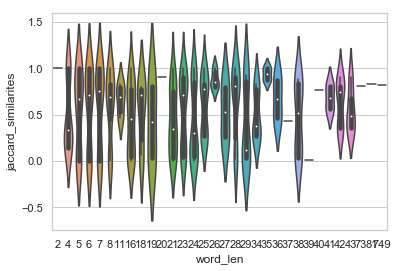

In [88]:
sns.set(style="whitegrid")
ax = sns.violinplot(x="word_len", y="jaccard_similarites", data=seaborn_data ,scale_hue=True, orient="v", scale="width", hspace = 1888)